In [23]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns 

In [24]:
import pandas 
from sklearn import linear_model, model_selection

In [25]:
df = pandas.read_csv('../feature_sets/bgl3_pnpg_enzyme_design.csv', index_col=0)
df.head()

,total_score,fa_rep,hbond_sc,tot_pstat_pm,tot_nlpstat_pm,tot_burunsat_pm,tot_hbond_pm,tot_NLconts_pm,tot_nlsurfaceE_pm,SR_1_total_score,...,SR_4_pstat_pm,SR_4_nlpstat_pm,SR_5_total_score,SR_5_fa_rep,SR_5_hbond_sc,SR_5_interf_E_1_2,SR_5_dsasa_1_2,SR_5_hbond_pm,SR_5_burunsat_pm,data
name,,,,,,,,,,,,,,,,,,,,,
M1M,0.771377,0.324965,1.381550,0.496523,-1.129409,-0.110401,-1.870368,0.038253,0.791025,0.394521,...,0.933962,0.665144,1.238383,-0.132857,1.665860,1.229979,0.388422,-1.603987,-0.184770,0.000
V2A,0.311979,-0.327288,0.824431,-0.332516,-0.366978,1.780605,0.222430,-0.571648,-0.928011,-1.166519,...,1.909017,1.640955,0.789474,-0.482147,1.055475,0.799959,-0.338613,-1.238627,1.654501,-0.162
V2D,0.730867,0.065346,0.368125,-0.608863,-0.748194,1.558134,-0.475170,-0.673298,-0.354999,0.463900,...,0.326550,0.773567,0.852405,0.216433,0.365820,0.854498,0.388422,-0.873266,0.275048,0.227
V2G,0.034014,0.453172,0.256701,1.325562,0.014237,1.669369,-1.521569,-0.571648,1.364037,-0.585465,...,-0.984181,-1.268409,0.025910,0.103027,0.223133,0.025923,-0.338613,-0.507906,0.734866,-0.242
V2I,0.019792,-0.195074,0.193030,-0.608863,-0.748194,-0.110401,0.571229,0.648153,-0.354999,0.273106,...,0.102766,-1.412973,0.684589,0.171071,0.286549,0.690881,-0.338613,0.222814,-0.184770,-0.294


In [26]:
X = df.drop('data', axis=1)
y = df['data'].ravel()

X.shape, y.shape 

((3306, 44), (3306,))

In [27]:
corr = df.corr()[['data']]
corr['abs_R'] = abs(corr['data'])
corr.sort_values('abs_R')

,data,abs_R
SR_2_pstat_pm,0.001244,0.001244
tot_burunsat_pm,-0.001456,0.001456
SR_4_pstat_pm,-0.001555,0.001555
SR_4_fa_rep,0.001954,0.001954
SR_5_hbond_sc,-0.002306,0.002306
tot_hbond_pm,0.002838,0.002838
SR_2_hbond_sc,-0.003598,0.003598
SR_2_hbond_pm,0.005640,0.005640
SR_1_total_score,0.005757,0.005757
SR_3_total_score,0.005757,0.005757


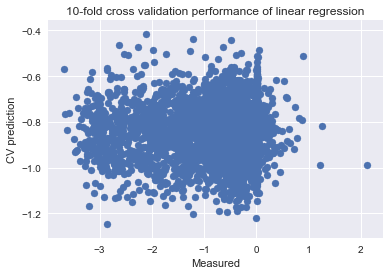

In [28]:
clf = linear_model.LinearRegression()

pred = model_selection.cross_val_predict(clf, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, pred) 
ax.set(title='10-fold cross validation performance of linear regression', xlabel='Measured', ylabel='CV prediction')

/Users/alex/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/alex/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/alex/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/alex/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not conver

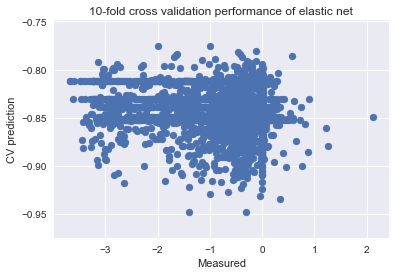

In [30]:
clf = linear_model.ElasticNetCV()

pred = model_selection.cross_val_predict(clf, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, pred) 
ax.set(title='10-fold cross validation performance of elastic net', xlabel='Measured', ylabel='CV prediction')